# <div dir=rtl> תרגול תשיעי - Feature Selection </div>
<div dir=rtl>
     עד כה הכרנו מודלים. מודל מקבל אוסף פיצ'רים ונותן פרדיקציה. עבור מודלים של למידה מונחה נשאף שהפרדיקציה תהיה דומה ככל האפשר לידע מוקדם שיש לנו - על הלייבל.
</div>

\begin{align}
\hat{y} = f(X)\\
\hat{y} \approx y
\end{align}

<div dir=rtl>
     בתרגול זה נכיר שיטות לבחירה של פיצ'רים בהינתן דאטא-סט.
</div>
<br />

## <div dir=rtl> שאלה  1 </div>
<div dir=rtl>
     בשנת 1988 פרסמו במשותף מספר מכוני מחקר באירופה מידע על אודות 303 חולי לב. המידע כלל נתונים הנכרשו בעת הגעה של המטופל לבית החולים לבדיקה.
    <br />
</div>

- Age (age in years)
- Sex (1 = male; 0 = female)
- CP (chest pain type)
- TRESTBPS (resting blood pressure (in mm Hg on admission to the hospital))
- CHOL (serum cholestoral in mg/dl)
- FPS (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- RESTECH (resting electrocardiographic results)
- THALACH (maximum heart rate achieved)
- EXANG (exercise induced angina (1 = yes; 0 = no))
- OLDPEAK (ST depression induced by exercise relative to rest)
- SLOPE (the slope of the peak exercise ST segment)
- CA (number of major vessels colored by flourosopy (0 = 0, >1 = 1))
- THAL (3 = normal; 6 = fixed defect; 7 = reversable defect)
- TARGET (1 or 0)


<div dir=rtl>
     את טענו את הקובץ בצורה המתאימה למידע טבלאי.
</div>

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, plot_roc_curve
from sklearn.model_selection import train_test_split


In [2]:
%ls

9.heart.csv*          9_recitation_9.html*  9_recitation_9.ipynb*


In [3]:
df = pd.read_csv('9.heart.csv')
df.sample(5)

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
294   44    1   0       120   169    0        1      144      1      2.8   
271   61    1   3       134   234    0        1      145      0      2.6   
214   56    1   0       125   249    1        0      144      1      1.2   
173   58    1   2       132   224    0        0      173      0      3.2   
91    57    1   0       132   207    0        1      168      1      0.0   

     slope  ca  thal  target  
294      0   0     1       0  
271      1   2     2       0  
214      1   1     2       0  
173      2   2     3       0  
91       2   0     3       1

<div dir=rtl>
     טענו את הקובץ. כעת נחקור את הנתונים.
</div>


In [4]:
df.describe().T

count        mean        std    min    25%    50%    75%    max
age       303.0   54.366337   9.082101   29.0   47.5   55.0   61.0   77.0
sex       303.0    0.683168   0.466011    0.0    0.0    1.0    1.0    1.0
cp        303.0    0.966997   1.032052    0.0    0.0    1.0    2.0    3.0
trestbps  303.0  131.623762  17.538143   94.0  120.0  130.0  140.0  200.0
chol      303.0  246.264026  51.830751  126.0  211.0  240.0  274.5  564.0
fbs       303.0    0.148515   0.356198    0.0    0.0    0.0    0.0    1.0
restecg   303.0    0.528053   0.525860    0.0    0.0    1.0    1.0    2.0
thalach   303.0  149.646865  22.905161   71.0  133.5  153.0  166.0  202.0
exang     303.0    0.326733   0.469794    0.0    0.0    0.0    1.0    1.0
oldpeak   303.0    1.039604   1.161075    0.0    0.0    0.8    1.6    6.2
slope     303.0    1.399340   0.616226    0.0    1.0    1.0    2.0    2.0
ca        303.0    0.729373   1.022606    0.0    0.0    0.0    1.0    4.0
thal      303.0    2.313531   0.612277    0.0    2.0    2.0    3.0    3.0
target    303.0    0.544554   0.498835    0.0    0.0    1.0    1.0    1.0

In [5]:
df['target'].value_counts(normalize=True)

1    0.544554
0    0.455446
Name: target, dtype: float64

In [6]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<div dir=rtl>
     מהנתונים למעלה אנחנו רואים שבדאטא קיימים פיצ'רים קטגוריאליים ופיצ'רים רציפים. נפריד בין הפיצ'רים כך שבכל סוג נטפל בצורה המיועדת לו.
    <br />
    דבר נוסף שאנחנו רואים הוא שאין ערכים חסרים.
</div>

In [7]:
categorical_predictors = ['sex','cp','fbs','restecg','exang','slope','ca','thal']
continuous_predictors = ['age','trestbps', 'chol','thalach']

<div dir=rtl>
     כעת נקבע ביצועי בסיס. נבדוק את הביצועים של מודל רגרסיה לוגיסטית על כל הפיצ'רים בדאטא ועל כל אחד משני הסוגים של הפיצ'רים - רציף ובדיד.
</div>

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

naive_lr = LogisticRegression(
    max_iter=1e3
)

scores = cross_val_score(naive_lr,df.drop('target',axis='columns'), df['target'])
print(f'over all features: {scores.mean():.3f} ± {scores.std():.3f}')

scores = cross_val_score(naive_lr,df[categorical_predictors], df['target'])
print(f'over categorical features: {scores.mean():.3f} ± {scores.std():.3f}')

scores = cross_val_score(naive_lr,df[continuous_predictors], df['target'])
print(f'over continuous features: {scores.mean():.3f} ± {scores.std():.3f}')

over all features: 0.828 ± 0.046
over categorical features: 0.811 ± 0.060
over continuous features: 0.700 ± 0.048


In [19]:
import matplotlib
%matplotlib inline

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'axes.grid':True,
         'axes.grid.which':'both'
         }
plt.rcParams.update(params)



              precision    recall  f1-score   support

           0       0.83      0.69      0.75        29
           1       0.76      0.88      0.81        32

    accuracy                           0.79        61
   macro avg       0.80      0.78      0.78        61
weighted avg       0.79      0.79      0.78        61



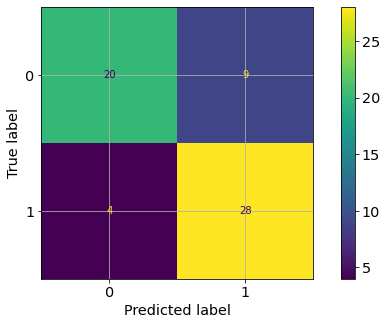

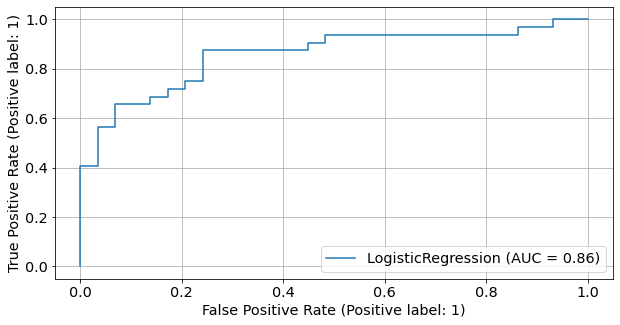

In [20]:
X = df.drop('target',axis='columns')
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
lr = LogisticRegression(max_iter=1e3)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
y_pred_prob = lr.predict_proba(X_test)

print(classification_report(y_test, y_pred))

plot_confusion_matrix(lr, X_test, y_test)

plot_roc_curve(lr, X_test, y_test) 

<div dir=rtl>
     ב. חיקרו את הפיצ'רים בצורה מפוקחת.
</div>
<br />
<div dir=rtl>
     המשמעות של "חקירה מפוקחת" (או מונחה) היא שאנחנו נחקור פיצ'רים לעומת הלייבל - כל פיצ'ר בפני עצמו. בתרגול זה נלמד על שיטות לבחירת פיצ'רים על בסיס הפיצ'רים עצמם - שיטות פילטר (נסתכל על הפיצ'רים ונפלטר אותם). בתרגול הבא נלמד על שיטות מעטפת (wrapper) לבחירת פיצ'רים.
</div>

<div>
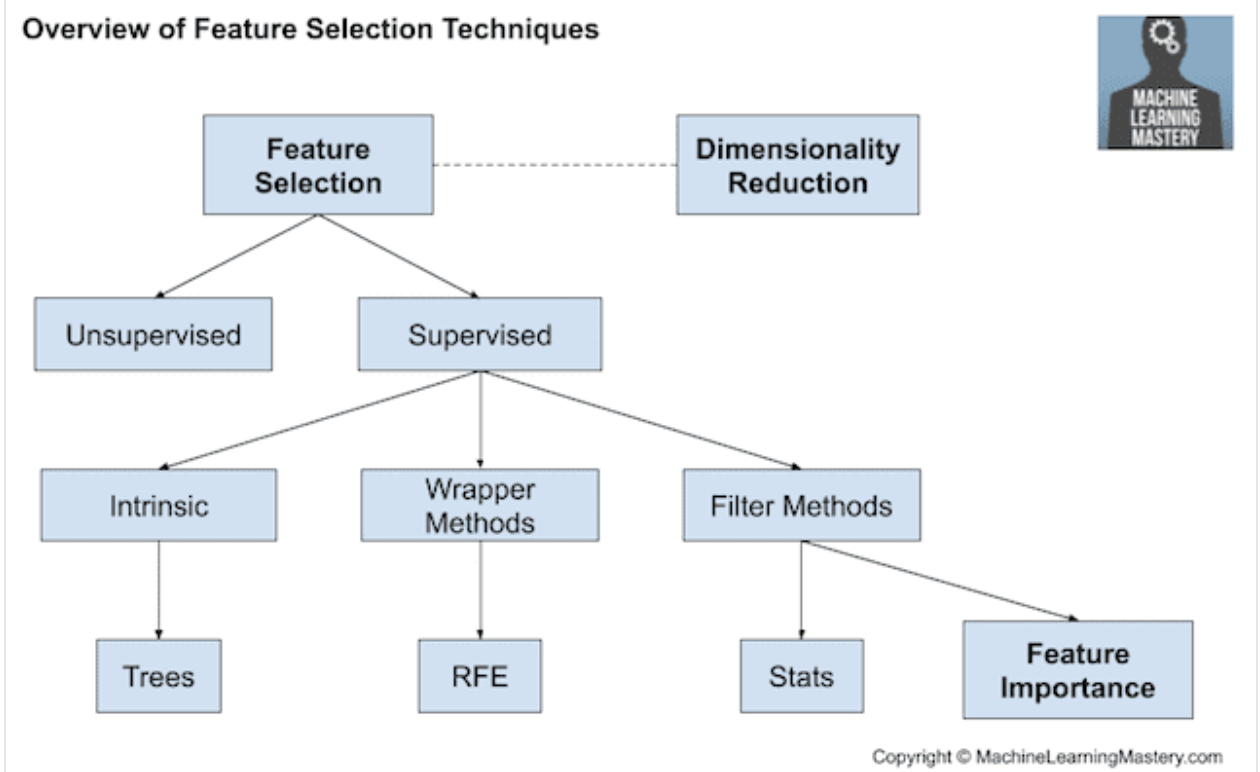
    </div>

<div dir=rtl>
     נתחיל מחקירה על פי פרמטרים סטטיסטיים. כאן עלינו לשאול איזה מבחן יהיה מתאים. לנוחות המבחנים האפשריים מסוכמים בטבלה:
</div>

| Feature\Label | Continuous | Categorical |
|-----|-------|------|
| Continuous | Correlation | Modeling |
| Categorical | ANOVA | Chi-Square |

<div dir=rtl>
     מכיוון שיש לנו לייבל בדיד ופיצ'רים משני הסוגים - נצטרך להפעיל שני מבחנים שונים.
    <br />
    נתחיל ממבחן סטטיסטי chi-square. למזלינו - המבחן ממומש כבר בחבילה sklearn.
</div>

In [21]:
from sklearn.feature_selection import chi2


chi2_test = pd.DataFrame(
    chi2(df[categorical_predictors], df['target']),
    columns=categorical_predictors,
    index=['chi2', 'pv']
)

chi2_test

sex            cp       fbs   restecg         exang     slope  \
chi2  7.576835  6.259810e+01  0.202934  2.978271  3.891438e+01  9.804095   
pv    0.005912  2.534982e-15  0.652363  0.084389  4.428074e-10  0.001741   

                ca      thal  
chi2  6.644077e+01  5.791853  
pv    3.605677e-16  0.016101

<div dir=rtl>
     בטבלה למעלה מה ש"מעניין" אותנו זה דווקא סטטיסטי המבחן - ככל שהערך שלו יותר גבוה, כך הסיכוי שהפיצ'ר הוא פרדיקטור יותר טוב גבוה יותר.
    <br />
    נבחן את זה. נסווג את הדאטא על פי פיצ'ר אחד בלבד.
</div>

In [22]:
results = pd.DataFrame([], columns=['results', 'score'])

for feature in categorical_predictors:
    scores = cross_val_score(naive_lr,df[[feature]], df['target'])
    
    results.loc[feature] = (f'{scores.mean():.3f} ± {scores.std():.3f}', scores.mean())
    
results

results     score
sex      0.614 ± 0.044  0.614044
cp       0.759 ± 0.020  0.759071
fbs      0.518 ± 0.035  0.518361
restecg  0.541 ± 0.047  0.541366
exang    0.720 ± 0.026  0.719617
slope    0.693 ± 0.028  0.692951
ca       0.736 ± 0.024  0.735902
thal     0.746 ± 0.074  0.745519

In [23]:
merged = pd.merge(results, chi2_test.T, right_index=True, left_index=True)
merged

results     score       chi2            pv
sex      0.614 ± 0.044  0.614044   7.576835  5.912318e-03
cp       0.759 ± 0.020  0.759071  62.598098  2.534982e-15
fbs      0.518 ± 0.035  0.518361   0.202934  6.523632e-01
restecg  0.541 ± 0.047  0.541366   2.978271  8.438939e-02
exang    0.720 ± 0.026  0.719617  38.914377  4.428074e-10
slope    0.693 ± 0.028  0.692951   9.804095  1.741237e-03
ca       0.736 ± 0.024  0.735902  66.440765  3.605677e-16
thal     0.746 ± 0.074  0.745519   5.791853  1.610061e-02

<AxesSubplot:xlabel='score', ylabel='chi2'>

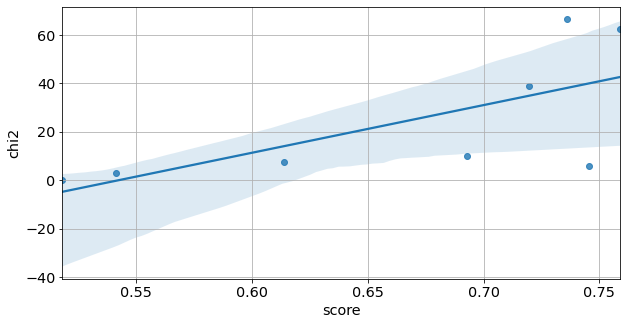

In [24]:
sns.regplot(x='score', y='chi2', data=merged)

In [25]:
top_f = merged.nlargest(3, 'score').index.to_list()
scores = cross_val_score(naive_lr,df[top_f], df['target'])
print(f'{scores.mean():.3f} ± {scores.std():.3f}')

0.818 ± 0.049


<div dir=rtl>
     בטבלה למעלה אנחנו רואים התאמה טובה בין המבחן הסטטיסטי לבין תוצאת הקרוס וולידציה.
    <br />
    כעת נעבור לטפל בפיצ'רים הרציפים.
    <br />
    במקרה זה אנחנו רוצים להשתמש במודל כלשהו, פשוט ככל הניתן, על מנת לתת מדד חשיבות לפיצ'רים. מכיוון שאנחנו משתמשים במודל מסוג רגרסיה לוגיסטית ואנחנו לא רוצים להתבסס על תוצאת הרגרסיה הלוגיסטית כדי לבחור פיצ'רים - נבחר במודל אחר - LDA.
</div>


In [26]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()

results = pd.DataFrame([], columns=['results'])

for feature in continuous_predictors:
    scores = cross_val_score(lda,df[[feature]], df['target'])
    
    results.loc[feature] = f'{scores.mean():.3f} ± {scores.std():.3f}'
    
results

results
age       0.623 ± 0.065
trestbps  0.555 ± 0.080
chol      0.541 ± 0.017
thalach   0.696 ± 0.027

<div dir=rtl>
     הנתונים למעלה מספרים שהפיצ'ר thalach הוא הפרדיקטור הטוב ביותר והבא אחריו הוא הגיל.
    <br />
    נראה את התוצאות על בסיס שני הפיצ'רים האלה בקרוס וולידציה:
</div>



In [27]:
scores = cross_val_score(naive_lr,df[['thalach','age']], df['target'])
print(f'{scores.mean():.3f} ± {scores.std():.3f}')

0.700 ± 0.030


<div dir=rtl>
     מהנתונים רואים שהצלחנו להגיע לתוצאת סיווג מרשימה על בסיס שני פיצ'רים בלבד.
</div>
<br />

<div dir=rtl> ג. חיקרו את הפיצ'רים בצורה לא מפוקחת. </div>
<br />
<div dir=rtl>
     לא מפוקחת - משווים פיצ'רים בינם לבין עצמם. שיטה זו יכולה להיות שימושית גם בסיווג, אבל גם בקיבוץ - שם אין לנו לייבלים.
    <br />
    במצב זה ננסה להשתמש במדדים מספריים על מנת לבדוק פיצ'ר מול פיצ'ר.
    <br />
    המדד הראשון והפשוט ביותר לבדיקה הוא הקורלציה בין הפיצ'רים. כמו שראינו בעבר - ניתן לממש זאת בצורה פשוטה בפנדס.
</div>

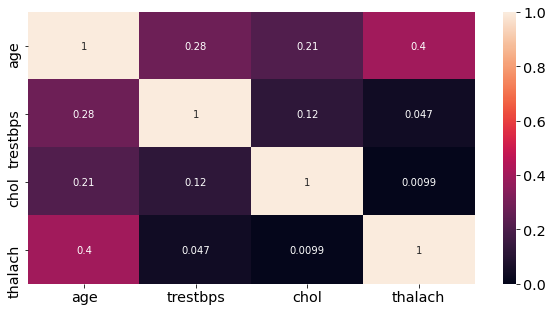

In [28]:
import seaborn as sns

hm = sns.heatmap(
    df[continuous_predictors].corr().abs(),
    vmin=0, 
    vmax=1,
    annot=True
)

<div dir=rtl>
     כעת עלינו להחליט איך להמשיך. ניתן לבחור את זוג הפיצ'רים עם הקורלציה הכי נמוכה (כמו שנעשה מיד), אך ניתן גם להחליט שאנו רוצים להישאר עם שלושה פיצ'רים. קיימות שיטות לבחינה של פיצ'ר מול קבוצה של פיצ'רים.
    <br />
    כעת נבחן את הסיווג עם זוג הפיצ'רים עם הקורלציה הנמוכה ביותר.
</div>

In [29]:
take = ['thalach', 'chol']

scores = cross_val_score(naive_lr,df[take], df['target'])
print(f'{scores.mean():.3f} ± {scores.std():.3f}')

0.706 ± 0.042


<div dir=rtl>
     לעיתים קורלציה לא מספקת בתור מדד. נשים לב שקורלציה טובה בעיקר לפיצ'רים שעולים או יורדים ביחד, ופחות לתבניות תלות אחרות.</div>
     
<div dir=rtl>
     מדד אחר, יותר כללי, למציאת תלות בין שני פיצ'רים הוא המידע ההדדי - Mutual Informaion:
</div>

\begin{align}
\operatorname{I}(X;Y) = \sum_{y \in \mathcal Y} \sum_{x \in \mathcal X}
    { p_{(X,Y)}(x,y) \log{ \left(\frac{p_{(X,Y)}(x,y)}{p_X(x)\,p_Y(y)} \right) }}
\end{align}

<div dir=rtl>
    המדד הזה מכמת כמה ידיעה של משתנה אחד עוזרת לנו לקבל אינפורמציה על משתנה אחר.<br /> 
     למטה בכתום - הקורלציה. בסגול - המידע ההדדי.
</div>

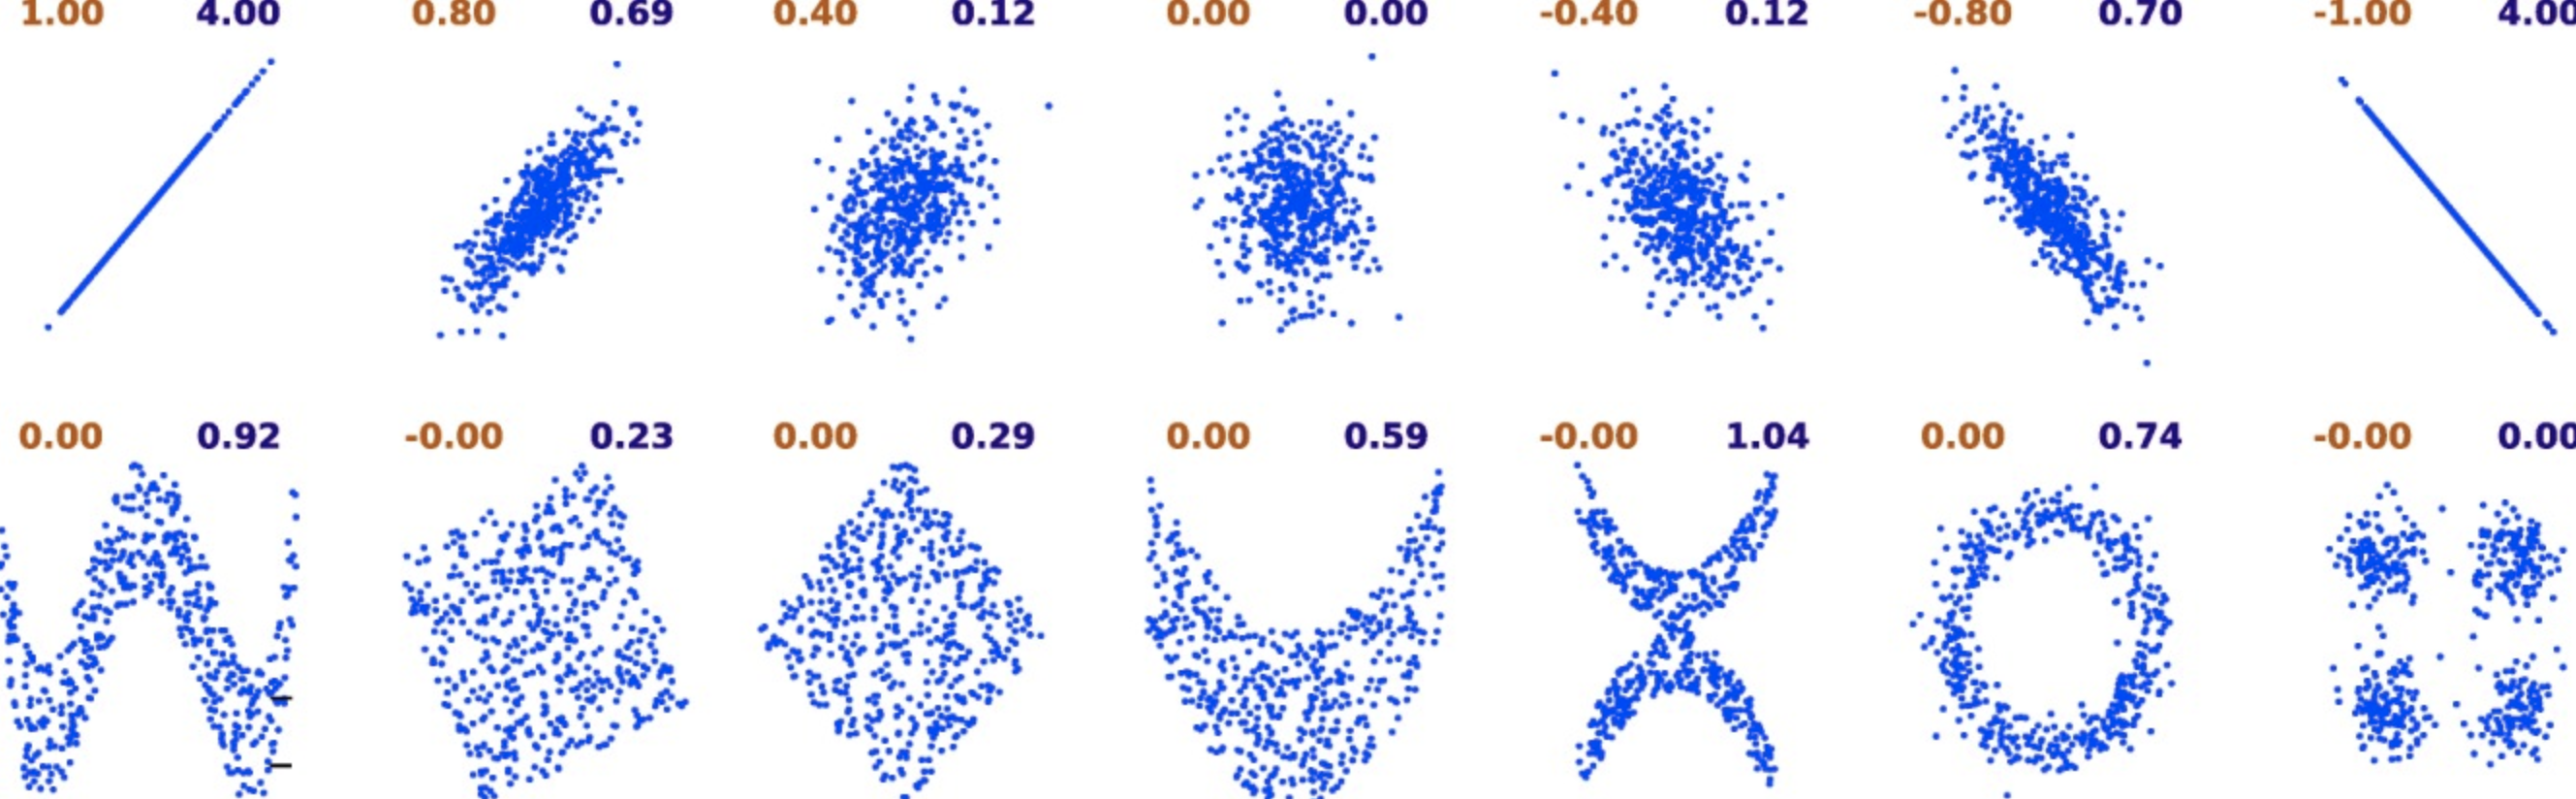

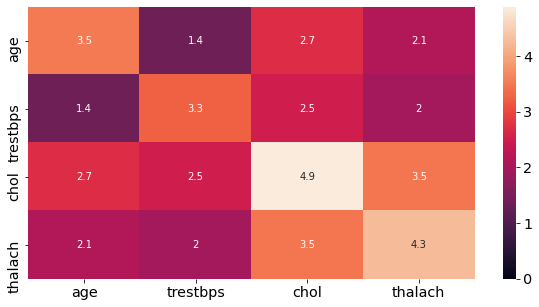

In [30]:
from sklearn.metrics import mutual_info_score

mi_df = pd.DataFrame(
    [],
    columns = continuous_predictors,
    index = continuous_predictors, 
    dtype=float
)

for i,f1 in enumerate(continuous_predictors):
    for j,f2 in enumerate(continuous_predictors):
        if i>j:
            continue
        mi = mutual_info_score(df.loc[:,f1], df.loc[:,f2])
        mi_df.loc[f1,f2] = mi
        mi_df.loc[f2,f1] = mi

        
        
hm = sns.heatmap(
    mi_df,
    vmin=0,
    annot=True
)

<div dir=rtl>
     חדי העין יבחינו באלכסון הטבלה. מה הוא מייצג? הוא מייצג את האנטרופיה של הפיצ'ר.
    <br />
    נבחר את שני הפיצ'רים על המידע ההדדי הנמוך ביותר - thalach  ו- trestbps.
</div>

In [31]:
take = ['thalach', 'trestbps']

scores = cross_val_score(naive_lr,df[take], df['target'])
print(f'{scores.mean():.3f} ± {scores.std():.3f}')

0.697 ± 0.047


<div dir=rtl>
     ואכן קיבלנו דיוק עם שני הפיצ'רים האלה הדומה מאוד לדיוק על פני ארבעת הפיצ'רים.
</div>
<br />
<div dir=rtl>
     ד. חיקרו את כל הפיצ'רים בצורה מפוקחת על ידי מודל.
</div>
<br />
<div dir=rtl>
     קיימים מספר מודלים אשר מסוגלים לאפיין את הפיצ'רים שברשותם לפי מדד לחשיבות. מודל עץ הוא אחד כזה. באופן ספציפי מודל מסוג Random Forest מסוגל לספק מדד לטיב הפיצ'רים. המודל עושה התאמה של הרבה מאוד עצים כאשר הוא בוחר בכל פעם סט אקראי של פיצ'רים וסט אקראי של דאטא לאימון. המודל יכול להחזיר את החשיבות הממוצעת של כל פיצ'ר לאימון.
</div>


In [32]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(df.drop('target', axis='columns'), df['target'])
rf.feature_importances_

array([0.08762877, 0.03584635, 0.1573184 , 0.07311183, 0.0748354 ,
       0.00959765, 0.02423893, 0.11919575, 0.04435832, 0.09358449,
       0.05613163, 0.11616392, 0.10798857])

In [38]:
importance = pd.DataFrame(
    [rf.feature_importances_], 
    columns=df.drop('target',axis='columns').columns, 
    index=['importance']
)
importance

age       sex        cp  trestbps      chol      fbs  \
importance  0.085443  0.039632  0.120884  0.069933  0.075816  0.00781   

             restecg   thalach     exang   oldpeak     slope        ca  \
importance  0.020488  0.122559  0.052708  0.125181  0.056324  0.110762   

               thal  
importance  0.11246

In [39]:
importance.T.sort_values(by='importance', ascending=False)

importance
oldpeak     0.125181
thalach     0.122559
cp          0.120884
thal        0.112460
ca          0.110762
age         0.085443
chol        0.075816
trestbps    0.069933
slope       0.056324
exang       0.052708
sex         0.039632
restecg     0.020488
fbs         0.007810

<div dir=rtl>
     כעת נשווה בין אימון מודל על כל הפיצ'רים לעומת הפיצ'רים עם חשיבות גדולה מ0.1 ביער אקראי וברגרסיה לוגיסטית.
</div>

In [40]:
scores = cross_val_score(rf,df.drop('target', axis='columns'), df['target'])
print(f'{scores.mean():.3f} ± {scores.std():.3f}')

0.808 ± 0.035


In [41]:
scores = cross_val_score(rf,df[['cp','ca','oldpeak','thal','thalach']], df['target'])
print(f'{scores.mean():.3f} ± {scores.std():.3f}')

0.782 ± 0.054


<div dir=rtl>
     כלומר הגענו לקלסיפיקציה מאוד דומה.
</div>

In [42]:
lr = LogisticRegression(
    max_iter=1e3
)

scores = cross_val_score(lr,df[['cp','ca','oldpeak','thal','thalach']], df['target'])
print(f'{scores.mean():.3f} ± {scores.std():.3f}')

0.832 ± 0.084


<div dir=rtl>
     כלומר שיפרנו את הקלסיפיקציה לעומת המצב בו השתמשנו בכל הדאטא.
</div>
<br />

<div dir=rtl> ה. השתמשו בכל הדאטא על מנת לייצר שני פיצ'רים בעלי יכולת סיווג מקסימלית. </div>
<br />
<div dir=rtl>
     כעת ברצוננו לראות איך ניתן לייצר פיצ'רים חדשים מתוך אלה הקיימים. ניזכר בשיטת PCA ונראה אותה שוב בהקשר הזה.
    <br />
    נשים לב שלא מדובר בשיטה מעולם ה Feature Selection אלא מעולם ה Feature Extraction. 
    <br />
    השיטה מייצרת קומפוננטות (פיצ'רים) מתוך הדאטא הקיים. בתהליך אנחנו מקבלים את החשיבות היחסית של כל קומפוננטה - יחס השונות המוסברת של כל פיצ'ר לסט הפיצ'רים.
</div>

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()

target = df['target'].copy()
df -= df.mean()
df /= df.std() + 1e-8
df['target'] = target

extracted_features = pca.fit_transform(
    df[continuous_predictors + categorical_predictors]
)

extracted_features = pd.DataFrame(
    extracted_features, 
    columns=[f'component {n}' for n in range(extracted_features.shape[1])]
)
extracted_features

<div dir=rtl>
     למעלה אנחנו רואים שיישמנו את השיטה על כל הפיצ'רים. כאן אנחנו מניחים הנחה - עבור פיצ'רים שהם קטגוריאליים עם יותר ממחלקה אחת, קיים סדר בין המחלקות בפיצ'ר, כלומר מחלקה 2 באה אחרי 1 ולפני 3.
    <br />
    נראה כעת את השונות המוסברת:
</div>

In [ ]:
pca.explained_variance_ratio_

<div dir=rtl>
     כלומר קיבלנו שכ40% מהשונות בדאטא מגיעה משלוש הקומפוננטות הראשונות. נאמן מודל על בסיס הקומפוננטות האלה:
</div>

In [ ]:
rf = RandomForestClassifier()


scores = cross_val_score(
    lr,
    extracted_features[['component 0', 'component 1', 'component 2']],
    df['target']
)

print(f'{scores.mean():.3f} ± {scores.std():.3f}')

<div dir=rtl>
     כלומר הגענו לרמת דיוק כמעט זהה למצב בו השתמשנו בכל סט הפיצ'רים.
</div>